In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [19]:
image = cv2.imread('../images/5.2.09.jpg', 0)

(512, 512)

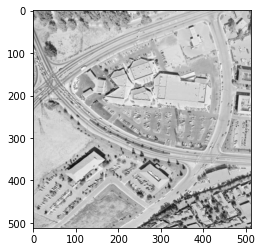

In [20]:
plt.imshow(image, cmap='gray');
image.shape

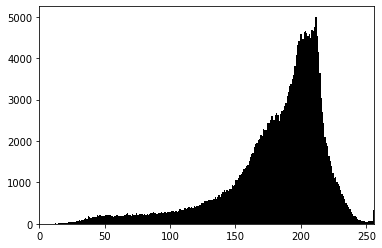

In [23]:
#display the histogram
def  histogram(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    plt.hist(image.flatten(), 256, [0,256], color = 'k')
    plt.xlim([0,256])
    plt.show()
    
histogram(image)

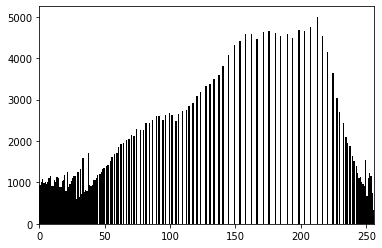

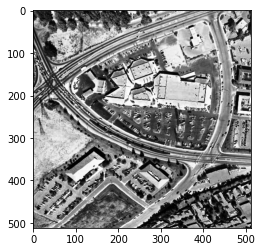

In [37]:
# implement the histogram equalization
def hist_equal(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[image]
    return img2

histogram_equalized = hist_equal(image)
histogram_equalized.shape

histogram(histogram_equalized);
plt.imshow(histogram_equalized, cmap='gray');

In [23]:
(cv2.split(image)[0] == image[:,:,0]).sum()

262144